在完成了对数据的透视之后，我们可以将数据透视的结果通过可视化的方式呈现出来，简单的说，就是将数据变成漂亮的统计图表，然后进一步发现和解读数据背后隐藏的商业价值。在之前的课程中，我们已经为大家展示过用使用Series或DataFrame对象的plot方法生成可视化图表的操作，本章我们为大家讲解plot方法的基石，它就是大名鼎鼎的matplotlib库。

在 Notebook 中，我们可以用下面的方式导入matplotlib。为了解决图表中文显示的问题，我们可以通过pyplot模块的rcParams属性修改配置参数，具体的操作如下所示

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC']
plt.rcParams['axes.unicode_minus'] = False

In [13]:
%config InlineBackend.figure_format='svg'

### 绘图的流程

##### 创建画布

pyplot模块的figure函数可以用来创建画布，创建画布时，可以通过figsize参数指定画布的尺寸（默认值是[6.4, 4.8]）；可以通过dpi参数设置绘图的分辨率，因为dpi代表了每英寸的像素点数量。除此之外，还可以通过facecolor参数设置画布的背景色。figure函数的返回值是一个Figure对象，它代表了绘图使用的画布，我们可以基于画布来创建绘图使用的坐标系。

In [14]:
plt.figure(figsize=(8, 4), dpi=120, facecolor='darkgray')

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### 创建坐标系

可以直接使用pyplot模块的subplot函数来创建坐标系，该函数会返回Axes对象。subplot的前三个参数分别用来指定整个画布分成几行几列以及当前坐标系的索引，这三个参数的默认值都是1。如果需要在画布上创建多个坐标系，就需要使用该函数，否则就直接使用默认的也是唯一的坐标系。当然，也可以通过上面创建的Figure对象的add_subplot方法或add_axes方法来创建坐标系，前者跟subplot函数的作用一致，后者会产生嵌套的坐标系。

<AxesSubplot:>

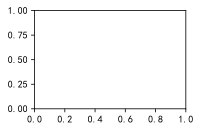

In [15]:
plt.subplot(2, 2, 1)

##### 绘制图像

###### 折线图

在绘图时，如果没有先调用figure函数和subplot函数，我们将使用默认的画布和坐标系，如果要绘制折线图，可以使用pyplot模块的plot函数，并指定横轴和纵轴的数据。折线图最适合用来观察数据的趋势，尤其是当横坐标代表时间的情况下。我们可以使用plot函数的color参数来定制折线的颜色，可以使用marker参数来定制数据点的标记（例如：*表示五角星，^表示三角形，o表示小圆圈等），可以使用linestyle参数来定制折线的样式（例如：-表示实线，--表示虚线，:表示点线等），可以使用linewidth参数来定制折线的粗细。 下面的代码绘制了一条正弦曲线，其中marker='*'会将数据点的标记设置为五角星形状，而color='red'会将折线绘制为红色。

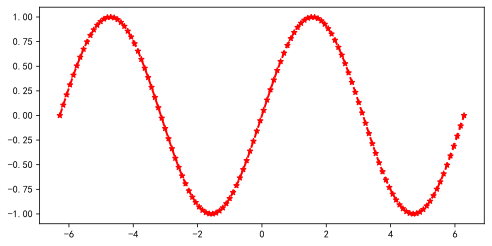

In [31]:
import numpy as np
x = np.linspace(-2 * np.pi,2 * np.pi, 120)
y = np.sin(x)
#创建画布
plt.figure(figsize = (8, 4), dpi = 120)
#绘制折线图
plt.plot(x, y, linewidth=2,marker='*',linestyle = '--', color = 'red')

如果要在一个坐标系上同时绘制正弦和余弦曲线，可以对上面的代码稍作修改。

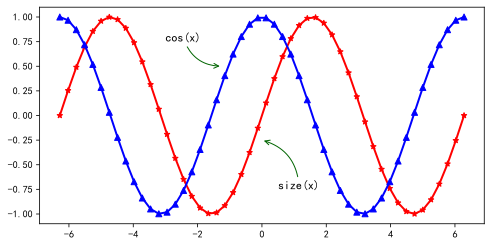

In [32]:
x = np.linspace(-2*np.pi, 2*np.pi)
y1, y2 = np.sin(x), np.cos(x)
plt.figure(figsize=(8, 4),dpi=120)
plt.plot(x, y1, linewidth=2, marker='*', color='red')
plt.plot(x, y2, linewidth=2, marker='^', color='b')
# 定制图表的标注，其中的arrowprops是定制箭头样式的参数
plt.annotate('size(x)', xytext=(0.5, -0.75), xy=(0, -0.25),fontsize=12, arrowprops={
    'arrowstyle': '->','color': 'darkgreen','connectionstyle': 'arc3,rad=0.35'
})
plt.annotate('cos(x)', xytext=(-3, 0.75), xy=(-1.25, 0.5), fontsize=12, arrowprops={
    'arrowstyle': '->', 'color': 'darkgreen', 'connectionstyle': 'arc3, rad=0.35'
})
plt.show()

如果要使用两个坐标系分别绘制正弦和余弦，可以用上面提到的subplot函数来创建坐标系，然后再绘图。

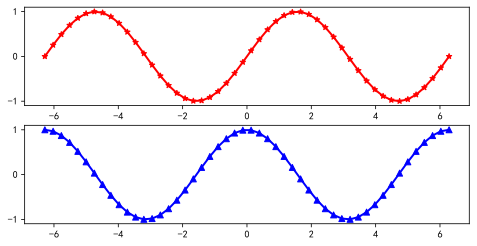

In [33]:
plt.figure(figsize=(8, 4), dpi=120)
#创建坐标系（第一个图）
plt.subplot(2, 1, 1)
plt.plot(x, y1, linewidth=2, marker='*', color='red')
# 创建坐标系（第2个图）
plt.subplot(2, 1, 2)
plt.plot(x, y2, linewidth=2, marker='^', color='b')
plt.show()

当然也可以像下面这么做，大家可以运行代码看看跟上面的图有什么区别。

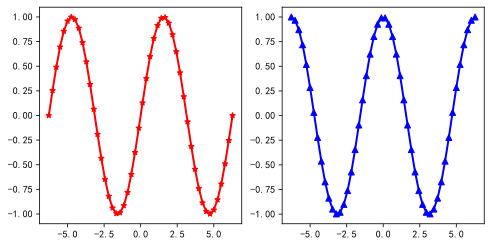

In [34]:
plt.figure(figsize=(8, 4), dpi=120)
plt.subplot(1, 2, 1)
plt.plot(x, y1, linewidth=2, marker='*', color='red')
plt.subplot(1, 2, 2)
plt.plot(x, y2, linewidth=2, marker='^', color='blue')
plt.show()

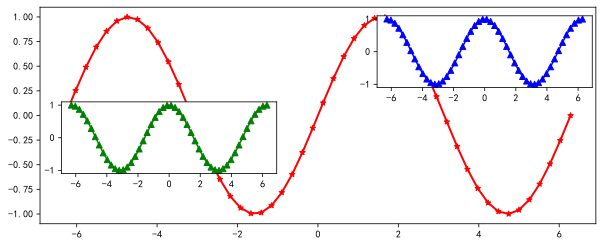

In [45]:
fig = plt.figure(figsize=(10, 4), dpi=120)
plt.plot(x, y1, linewidth=2, marker='*', color='red')
# 用Figure对象的add_axes方法在现有坐标系中嵌套一个新的坐标系
# 该方法的参数是一个四元组，代表了新坐标系在原坐标系中的位置
# 前两个值是左下角的位置，后两个值是坐标系的宽度和高度
ax = fig.add_axes((0.595, 0.6, 0.3,0.25))
ax.plot(x, y2, marker='^', color='blue')
ax = fig.add_axes((0.155, 0.3, 0.3,0.25))
ax.plot(x, y2, marker='^', color='green')
plt.show()

#### 散点图

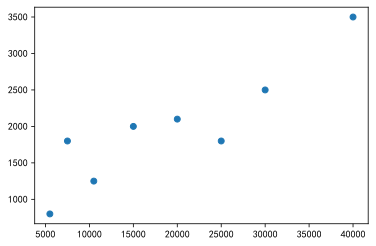

In [48]:
x = np.array([5500, 7500, 10500, 15000,20000, 25000,30000,40000])
y = np.array([800, 1800, 1250, 2000, 2100,1800 ,2500, 3500])
plt.figure(figsize=(6, 4), dpi=120)
plt.scatter(x, y)
plt.show()

#### 柱状图

在对比数据的差异时，柱状图是非常棒的选择，我们可以使用pyplot模块的bar函数来生成柱状图，也可以使用barh函数来生成水平柱状图。我们先为柱状图准备一些数据，代码如下所示。

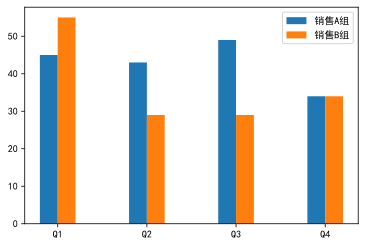

array([0, 1, 2, 3])

In [22]:
x = np.arange(4)
y1 = np.random.randint(20, 50, 4)
y2 = np.random.randint(10, 60, 4)

plt.figure(figsize=(6, 4), dpi=120)
#通过横坐标额便宜，让两组数据对应的柱子分开
#width参数控制柱子的粗细，label参数为柱子添加标签
plt.bar(x -0.1, y1, width = 0.2, label='销售A组')
plt.bar(x+0.1, y2, width=0.2, label='销售B组')
#定制横轴的刻度
plt.xticks(x, labels = ['Q1', 'Q2', 'Q3', 'Q4'])
#定制显示图例
plt.legend()
plt.show()
x

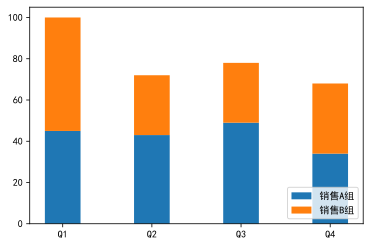

In [23]:
labels = ['Q1', 'Q2', 'Q3', 'Q4']
plt.figure(figsize=(6, 4), dpi=120)
plt.bar(labels, y1, width=0.4, label='销售A组')
# 注意：堆叠柱状图的关键是将之前的柱子作为新柱子的底部
# 可以通过bottom参数指定底部数据，新柱子绘制在底部数据之上
plt.bar(labels, y2, width=0.4, bottom=y1, label='销售B组')
plt.legend(loc='lower right')
plt.show()

#### 饼状图

饼状图通常简称为饼图，是一个将数据划分为几个扇形区域的统计图表，它主要用于描述数量、频率等之间的相对关系。在饼图中，每个扇形区域的大小就是其所表示的数量的比例，这些扇形区域合在一起刚好是一个完整的饼。在需要展示数据构成的场景下，饼状图、树状图和瀑布图是不错的选择，我们可以使用pyplot模块的pie函数来绘制饼图，代码如下所示。

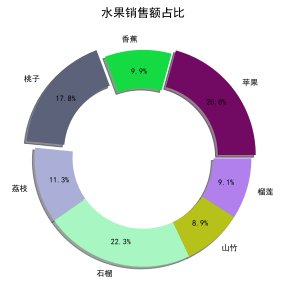

In [24]:
data = np.random.randint(100, 500, 7)
labels = ['苹果', '香蕉', '桃子', '荔枝', '石榴', '山竹', '榴莲']

plt.figure(figsize=(5, 5), dpi=120)
plt.pie(data,
       #自定显示百分比
       autopct='%.1f%%',
       #饼图的半径
       radius=1,
       #百分比到圆心的距离
       pctdistance=0.8,
       #颜色（随机生成）,
       colors=np.random.rand(7, 3),
       #分离距离
       explode=[0.05,0,0.1,0,0,0,0],
       #阴影效果
        shadow=True,
       #字体属性
       textprops=dict(fontsize=8, color='black'),
       #楔子属性(生成换装饼图的关键)
       wedgeprops=dict(linewidth=1, width=0.35),
       #标签
       labels=labels
       )
# 定制图表的标题
plt.title('水果销售额占比')
plt.show()

###### 直方图

在统计学中，直方图是一种展示数据分布情况的图形，是一种二维统计图表，它的两个坐标分别是统计样本和该样本对应的某个属性的度量。下面的数据是某学校100名男学生的身高，如果我们想知道数据的分布，就可以使用直方图。

In [25]:
heights = np.array([170, 163, 174, 164, 159, 168, 165, 171, 171, 167, 
    165, 161, 175, 170, 174, 170, 174, 170, 173, 173, 
    167, 169, 173, 153, 165, 169, 158, 166, 164, 173, 
    162, 171, 173, 171, 165, 152, 163, 170, 171, 163, 
    165, 166, 155, 155, 171, 161, 167, 172, 164, 155, 
    168, 171, 173, 169, 165, 162, 168, 177, 174, 178, 
    161, 180, 155, 155, 166, 175, 159, 169, 165, 174, 
    175, 160, 152, 168, 164, 175, 168, 183, 166, 166, 
    182, 174, 167, 168, 176, 170, 169, 173, 177, 168, 
    172, 159, 173, 185, 161, 170, 170, 184, 171, 172])

可以使用pyplot模块的hist函数来绘制直方图，代码如下所示。

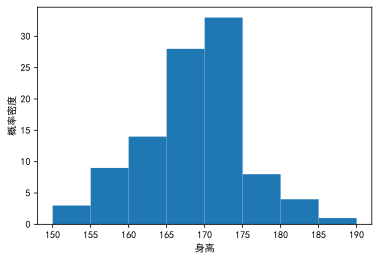

In [49]:
# 将身高数据分到以下8个组中
bins = np.array([150, 155, 160, 165, 170, 175, 180, 185, 190])
plt.figure(figsize=(6, 4), dpi=120)
# density参数默认值为False,表示纵轴显示频数
# 将density参数设置为True,纵轴会显示概率密度
plt.hist(heights, bins, density = False)
# 定制横轴标签
plt.xlabel('身高')
#定制纵轴标签
plt.ylabel('概率密度')
plt.show()

##### 箱线图

箱线图又叫箱型图或盒须图，是一种用于展示一组数据分散情况的统计图表，如下所示。因图形如箱子，而且在上下四分位数之外有线条像胡须延伸出去而得名。在箱线图中，箱子的上边界是上四分位数（$Q_3$）的位置，箱子的下边界是下四分位数（$Q_1$）的位置，箱子中间的线条是中位数（$Q_2$）的位置，而箱子的长度就是四分位距离（IQR）。除此之外，箱子上方线条的边界是最大值，箱子下方线条的边界是最小值，这两条线之外的点就是离群值（outlier）。所谓离群值，是指数据小于$Q_1 - 1.5 \times IQR$或数据大于$Q_3 + 1.5 \times IQR$的值，公式中的1.5还可以替换为3来发现极端离群值（extreme outlier），而介于1.5到3之间的离群值通常称之为适度离群值（mild outlier）。

可以使用pyplot模块的boxplot函数来绘制箱线图，代码如下所示。

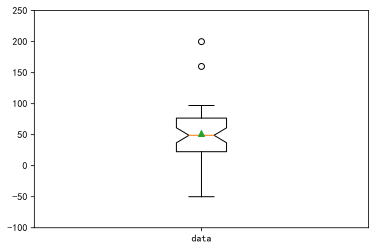

In [50]:
# 数组中有47个[0, 100)范围的随机数
data = np.random.randint(0, 100, 47)
#向数组中添加三个可能的利群点的数据
data = np.append(data, 160)
data = np.append(data, 200)
data = np.append(data, -50)

plt.figure(figsize=(6, 4), dpi=120)
# whis参数的默认值是1.5，将其设置为3可以检测极端立群值
#  showmeans=True表示在图中标记均值的位置
plt.boxplot(data, whis=1.5, showmeans=True, notch=True)
# 定制纵轴的取值范围
plt.ylim([-100, 250])
#定制横轴的刻度
plt.xticks([1], labels=['data'])
plt.savefig('chart.png')
plt.show()

##### 显示或保存图像

可以使用pyplot模块的show函数来显示绘制的图表，我们在上面的代码中使用过这个函数。如果希望保存图表，可以使用savefig函数。需要注意的是，如果要同时显示和保存图表，应该先执行savefig函数，再执行show函数，因为在调用show函数时，图表已经被释放，位于show函数之后的savefig保存的只是一个空白的区域。

In [28]:
plt.savefig('chart.png')
plt.show()

<Figure size 432x288 with 0 Axes>